# Factory Methodパターン

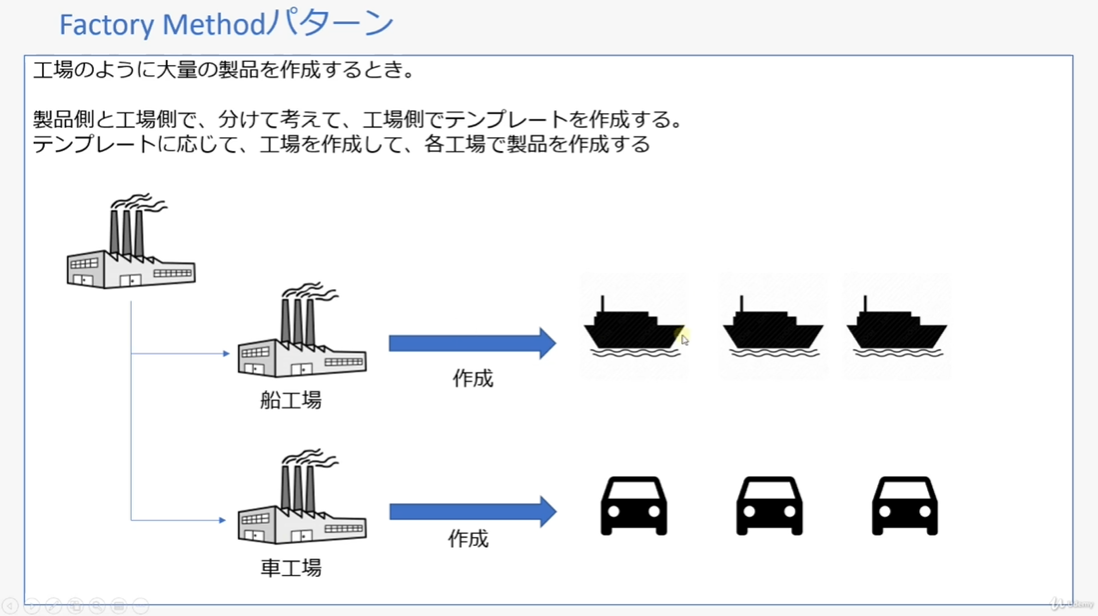

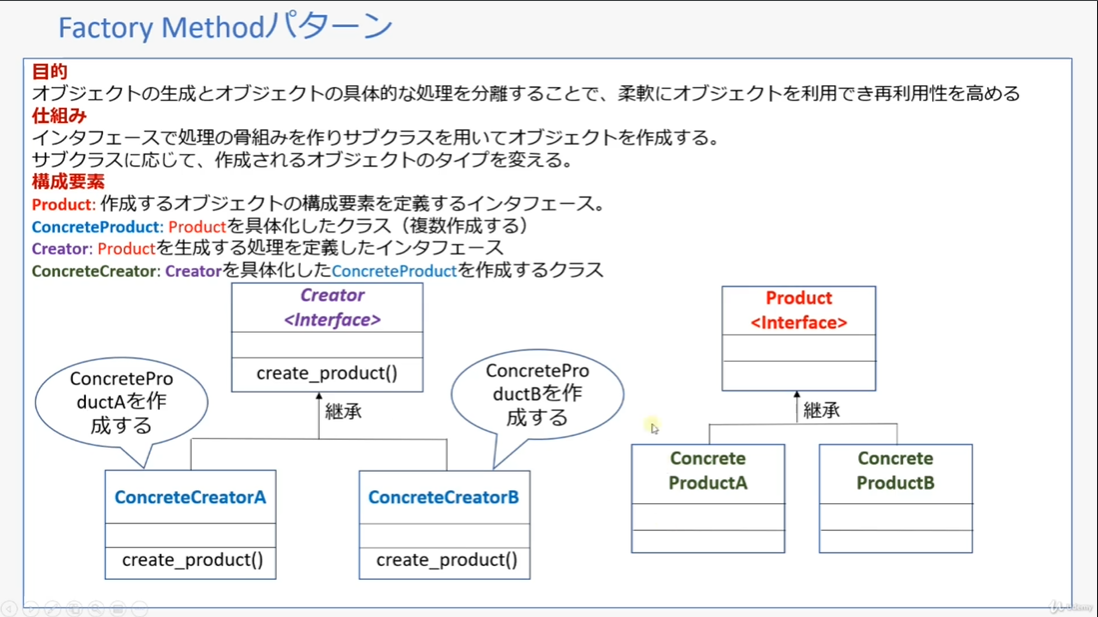

In [3]:
from abc import ABC, abstractproperty, abstractmethod

class IFactory(ABC):
    
    def __init__(self):
        self.registerd_owners = []
    
    def create(self, owner):
        self._owner = owner
        product = self._create_product()
        self._register_product(product)
        return product
    
    @abstractmethod
    def _create_product(self):
        pass
    
    @abstractmethod
    def _register_product(self, product):
        pass
    
class CarFactory(IFactory):
    
    def _create_product(self):
        return Car(self._owner)
    
    def _register_product(self, product):
        self.registerd_owners.append(product.owner)
        
class ShipFactort(IFactory):
    
    def _create_product(self):
        return Ship(self._owner)
    
    def _register_product(self, product):
        self.registerd_owners.append(product.owner)
        

class IProduct(ABC):
    
    def __init__(self, owner):
        self._owner = owner
        
    @abstractmethod
    def use(self):
        pass
    
    @abstractproperty
    def owner(self):
        pass
    
    
class Car(IProduct):
    
    def use(self):
        print(f'{self.owner}: 車を運転します')
        
    @property
    def owner(self):
        return self._owner
    
    
class Ship(IProduct):
    
    def use(self):
        print(f'{self.owner}: 船を運転します')
        
    @property
    def owner(self):
        return self._owner
    
    
car_factory = CarFactory()
yamada_car = car_factory.create('山田')
sato_car = car_factory.create('佐藤')

yamada_car.use()
sato_car.use()

print(car_factory.registerd_owners)

山田: 車を運転します
佐藤: 車を運転します
['山田', '佐藤']
